In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_fe_resnext import FCFEResNeXt
from notebooks.daudt.net_trainer import get_img_trio

In [2]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

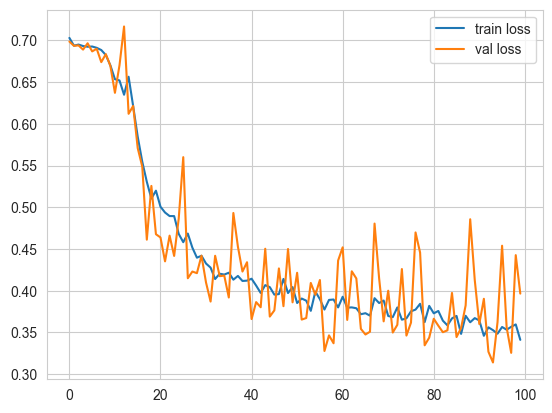

In [3]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [3]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.895328,0.110454,0.469376,0.853149,0.931030,0.966400,0.989532
change accuracy,33.0,0.405647,0.389030,0.000000,0.031039,0.337336,0.746324,1.000000
no change accuracy,33.0,0.901063,0.135894,0.377946,0.853369,0.964111,0.985504,1.000000
precision,28.0,0.204161,0.139170,0.000000,0.098796,0.196910,0.296744,0.450268
recall,33.0,0.391410,0.380963,0.000000,0.027496,0.283482,0.698901,1.000000
dice,25.0,0.294003,0.184962,0.005990,0.126649,0.283085,0.451972,0.580489
kappa,33.0,0.180948,0.177149,-0.024694,0.003938,0.144230,0.321476,0.509794


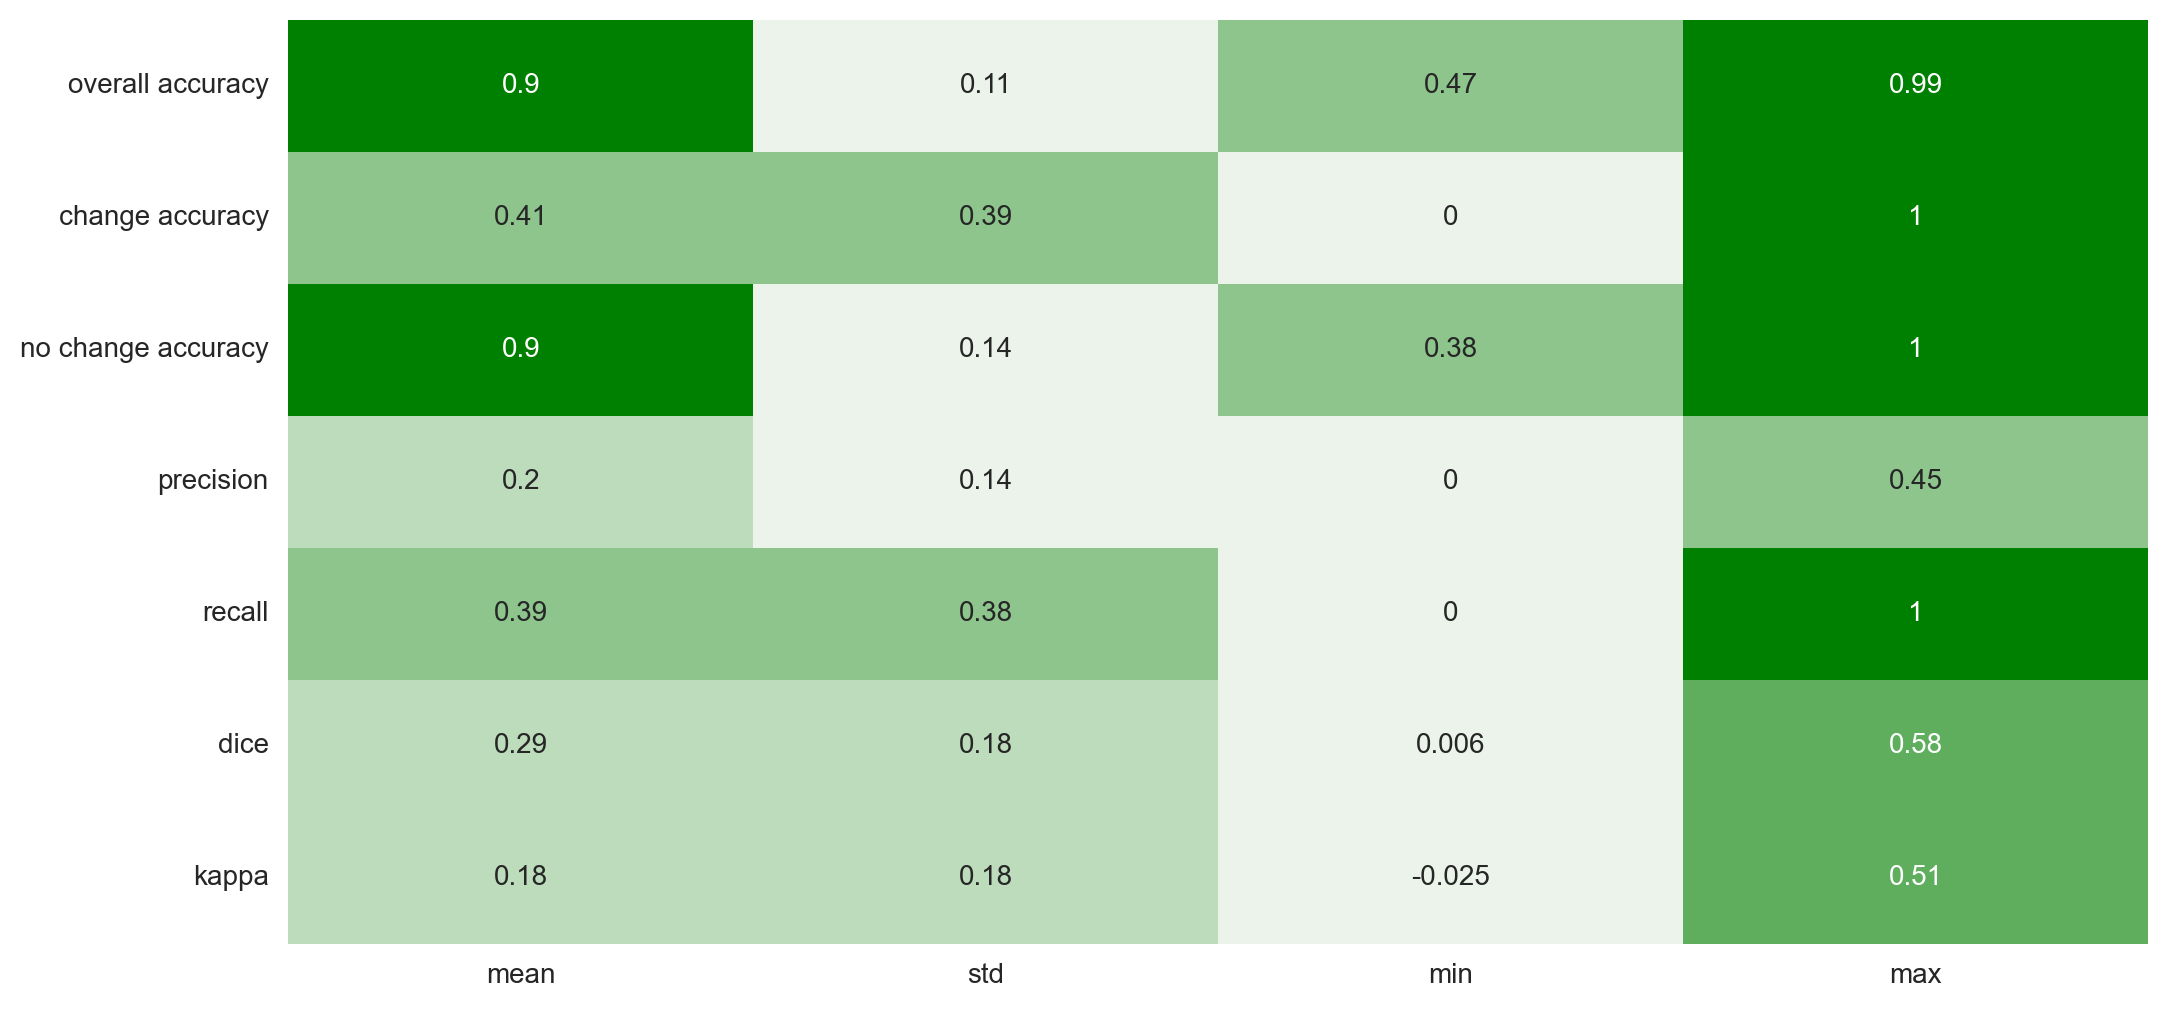

In [4]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [5]:
model = FCFEResNeXt(6, 2)
state = torch.load(f"./best_model.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

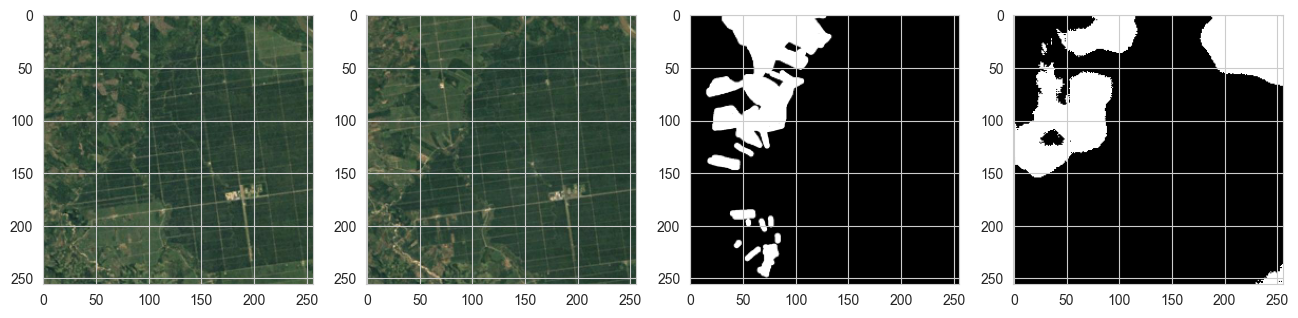

In [16]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    img = torch.cat((img1, img2))
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')